In [136]:
import numpy as np
import pandas as pd


In [137]:
train = pd.read_csv("bike-sharing-demand/train.csv",parse_dates=['datetime'],index_col=0)

In [138]:
import xgboost as xgb

In [139]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [140]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [141]:
train['weather'].unique()

array([1, 2, 3, 4])

In [142]:
train.corr()['count']

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64

In [135]:
train.index

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-19 14:00:00', '2012-12-19 15:00:00',
               '2012-12-19 16:00:00', '2012-12-19 17:00:00',
               '2012-12-19 18:00:00', '2012-12-19 19:00:00',
               '2012-12-19 20:00:00', '2012-12-19 21:00:00',
               '2012-12-19 22:00:00', '2012-12-19 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=10886, freq=None)

In [143]:
train['year'] = train.index.year
train['day'] = train.index.day
train['month'] = train.index.month
train['dayofweek'] = train.index.dayofweek
train['hour'] = train.index.hour



In [144]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,day,month,dayofweek,hour
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5,4


In [145]:
regressor = xgb.XGBRegressor(max_depth=5,n_estimators=300)

In [146]:
regressor

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=5,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             objective='reg:squarederror', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None)

In [147]:

column_titles = ["count","season","holiday","workingday","weather","temp","atemp","humidity","windspeed",
           "year","day","month","dayofweek","hour"]

train=train.reindex(columns=column_titles)

In [148]:
train = train.reset_index(drop=True)


In [149]:
 x_train = train.iloc[:,1:]

In [150]:
 y_train = train.iloc[:,:1]

In [246]:
x_train.iloc[:100,:]
y_train

,count
0,16
1,40
2,32
3,13
4,1
...,...
10881,336
10882,241
10883,168
10884,129


In [152]:
from sklearn.model_selection import train_test_split
#X_train,X_test,Y_train,Y_test = train_test_split(x_train,y_train,test_size=0.2)
train_len = int(len(x_train)*0.8)

X_train = x_train.iloc[:train_len,:]
Y_train = y_train.iloc[:train_len,:]

X_test = x_train.iloc[train_len+1:,:]
Y_test = y_train.iloc[train_len+1:,:]

In [153]:
regressor.fit(X_train,Y_train,eval_set = [(X_train, Y_train), (X_test, Y_test)])

[0]	validation_0-rmse:182.56149	validation_1-rmse:266.80212
[1]	validation_0-rmse:144.23987	validation_1-rmse:223.08911
[2]	validation_0-rmse:120.32236	validation_1-rmse:188.57367
[3]	validation_0-rmse:104.45846	validation_1-rmse:169.34386
[4]	validation_0-rmse:90.36866	validation_1-rmse:151.71518
[5]	validation_0-rmse:81.81020	validation_1-rmse:138.51767
[6]	validation_0-rmse:67.63434	validation_1-rmse:120.30996
[7]	validation_0-rmse:63.71429	validation_1-rmse:113.10028
[8]	validation_0-rmse:60.48190	validation_1-rmse:109.31646
[9]	validation_0-rmse:53.51276	validation_1-rmse:98.53271
[10]	validation_0-rmse:52.09395	validation_1-rmse:95.65559
[11]	validation_0-rmse:50.67075	validation_1-rmse:93.95129
[12]	validation_0-rmse:49.95708	validation_1-rmse:92.38680
[13]	validation_0-rmse:49.14804	validation_1-rmse:91.57272
[14]	validation_0-rmse:46.03371	validation_1-rmse:86.91529
[15]	validation_0-rmse:45.59678	validation_1-rmse:86.23906
[16]	validation_0-rmse:43.93551	validation_1-rmse:84.

[139]	validation_0-rmse:23.93059	validation_1-rmse:65.52708
[140]	validation_0-rmse:23.84752	validation_1-rmse:65.54414
[141]	validation_0-rmse:23.75738	validation_1-rmse:65.59033
[142]	validation_0-rmse:23.73277	validation_1-rmse:65.73856
[143]	validation_0-rmse:23.71488	validation_1-rmse:65.75274
[144]	validation_0-rmse:23.66512	validation_1-rmse:65.72298
[145]	validation_0-rmse:23.59996	validation_1-rmse:65.61264
[146]	validation_0-rmse:23.53471	validation_1-rmse:65.64780
[147]	validation_0-rmse:23.51148	validation_1-rmse:65.65208
[148]	validation_0-rmse:23.42782	validation_1-rmse:65.56918
[149]	validation_0-rmse:23.32996	validation_1-rmse:65.70103
[150]	validation_0-rmse:23.27408	validation_1-rmse:65.65485
[151]	validation_0-rmse:23.24353	validation_1-rmse:65.65281
[152]	validation_0-rmse:23.19036	validation_1-rmse:65.60805
[153]	validation_0-rmse:23.12744	validation_1-rmse:65.53194
[154]	validation_0-rmse:23.06823	validation_1-rmse:65.45085
[155]	validation_0-rmse:23.00649	validat

[276]	validation_0-rmse:18.31771	validation_1-rmse:64.03690
[277]	validation_0-rmse:18.27839	validation_1-rmse:64.90276
[278]	validation_0-rmse:18.22698	validation_1-rmse:64.90538
[279]	validation_0-rmse:18.18383	validation_1-rmse:64.89874
[280]	validation_0-rmse:18.15166	validation_1-rmse:64.88805
[281]	validation_0-rmse:18.10870	validation_1-rmse:64.86626
[282]	validation_0-rmse:18.08023	validation_1-rmse:64.89091
[283]	validation_0-rmse:18.04142	validation_1-rmse:64.82157
[284]	validation_0-rmse:17.93756	validation_1-rmse:64.80687
[285]	validation_0-rmse:17.91352	validation_1-rmse:64.81031
[286]	validation_0-rmse:17.87542	validation_1-rmse:64.78207
[287]	validation_0-rmse:17.83064	validation_1-rmse:64.78668
[288]	validation_0-rmse:17.78657	validation_1-rmse:64.81497
[289]	validation_0-rmse:17.75360	validation_1-rmse:64.83282
[290]	validation_0-rmse:17.70556	validation_1-rmse:64.75716
[291]	validation_0-rmse:17.69311	validation_1-rmse:64.76388
[292]	validation_0-rmse:17.67862	validat

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

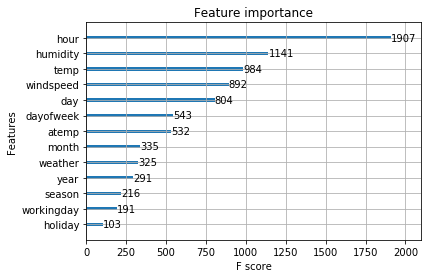

In [154]:
import matplotlib.pyplot as plt
xgb.plot_importance(regressor)
plt.show()

In [156]:
train = pd.read_csv("bike-sharing-demand/test.csv",parse_dates=['datetime'],index_col=0)

test['year'] = test.index.year
test['day'] = test.index.day
test['month'] = test.index.month
test['dayofweek'] = test.index.dayofweek
test['hour'] = test.index.hour

column_titles = ["season","holiday","workingday","weather","temp","atemp","humidity","windspeed",
           "year","day","month","dayofweek","hour"]

test=test.reindex(columns=column_titles)
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,day,month,dayofweek,hour
datetime,,,,,,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,20,1,3,0
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,20,1,3,1
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,20,1,3,2
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,20,1,3,3
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,20,1,3,4


In [209]:
final_pred = regressor.predict(test)
final_pred = final_pred.astype(int)

In [217]:
final_df = pd.DataFrame(columns=['datetime','count'])
test['season'][0]

1

In [220]:
test.index

DatetimeIndex(['2011-01-20 00:00:00', '2011-01-20 01:00:00',
               '2011-01-20 02:00:00', '2011-01-20 03:00:00',
               '2011-01-20 04:00:00', '2011-01-20 05:00:00',
               '2011-01-20 06:00:00', '2011-01-20 07:00:00',
               '2011-01-20 08:00:00', '2011-01-20 09:00:00',
               ...
               '2012-12-31 14:00:00', '2012-12-31 15:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=6493, freq=None)

In [237]:
final_df1 = pd.DataFrame()

final_df1['datetime'] = test.index
final_df1['count'] = final_pred

In [238]:
final_df1

,datetime,count
0,2011-01-20 00:00:00,18
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,267
6489,2012-12-31 20:00:00,178
6490,2012-12-31 21:00:00,126
6491,2012-12-31 22:00:00,98


In [239]:
final_df1[final_df1['count']<0] = 0

In [240]:
final_df1

,datetime,count
0,2011-01-20 00:00:00,18
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,267
6489,2012-12-31 20:00:00,178
6490,2012-12-31 21:00:00,126
6491,2012-12-31 22:00:00,98


In [241]:
for i,j in enumerate(final_pred):
    if(j<0):
        final_pred[i]=0
    #final_pred[i] = int(final_pred[i])

In [242]:
final_pred[0:20]

array([ 18,   0,   0,   0,   0,   0,  29, 109, 229, 137,  30,  63,  46,
        74,  72,  61, 112, 228, 190, 102])

In [243]:
final_pred_int = final_pred.astype(int)
final_pred_int

array([ 18,   0,   0, ..., 126,  98,  59])

In [245]:
final_df1.to_csv("final_pre.csv",sep=',',index=False)